In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
heart_disease = fetch_ucirepo(id=45) 

x = heart_disease.data.features 
y = heart_disease.data.targets 

In [3]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [4]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [5]:
df = pd.concat([x,y], axis = 1)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


<Axes: xlabel='num', ylabel='Count'>

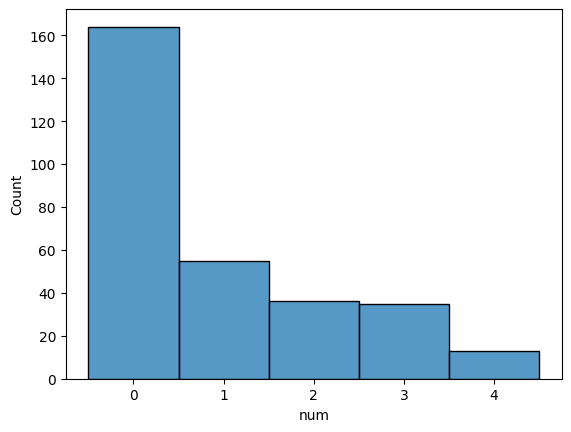

In [7]:
sns.histplot(x = "num", data = df, discrete = True)

<Axes: xlabel='num', ylabel='count'>

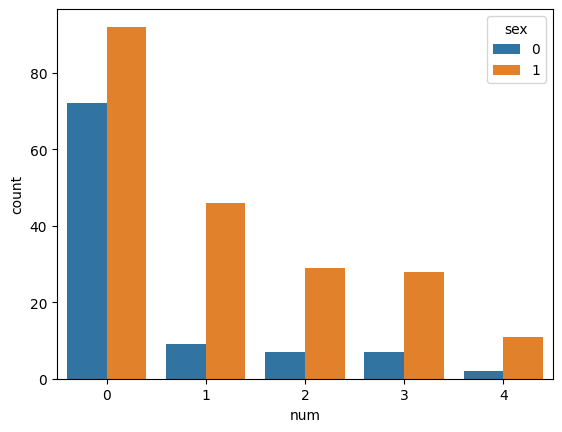

In [8]:
sns.countplot(x = "num", hue = "sex", data = df)

<Axes: xlabel='age', ylabel='num'>

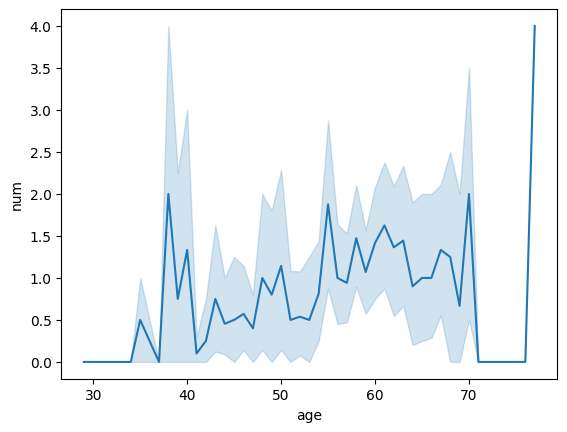

In [9]:
sns.lineplot(x = "age", y = "num", data = df)

<Axes: xlabel='age', ylabel='trestbps'>

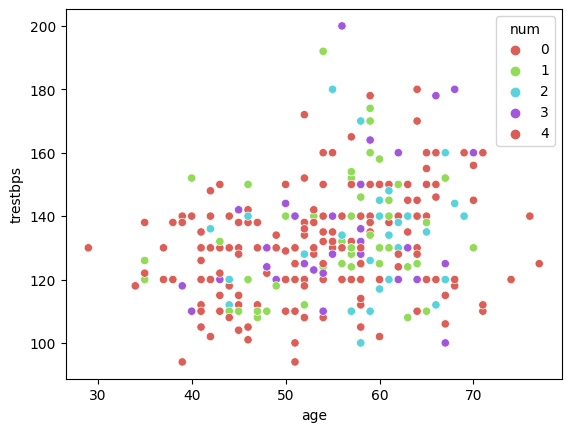

In [10]:
sns.scatterplot(x = "age", y = "trestbps", data = df, hue = "num", palette="hls")

<Axes: xlabel='num', ylabel='trestbps'>

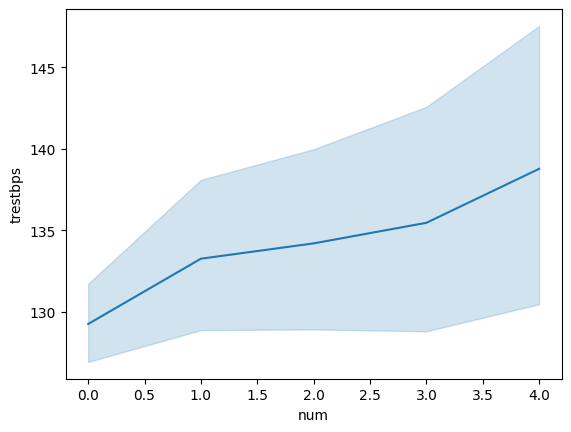

In [11]:
sns.lineplot(x = "num", y = "trestbps", data = df)

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [13]:
df.groupby("num").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
num,,,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.273292,3.797546
1,55.381818,0.836364,3.345455,133.254545,249.109091,0.072727,1.163636,145.927273,0.454545,1.005455,1.636364,0.740741,5.345455
2,58.027778,0.805556,3.750000,134.194444,259.277778,0.250000,0.916667,135.583333,0.611111,1.780556,1.888889,1.222222,6.028571
3,56.000000,0.800000,3.771429,135.457143,246.457143,0.228571,1.285714,132.057143,0.657143,1.962857,1.971429,1.457143,6.285714
4,59.692308,0.846154,3.692308,138.769231,253.384615,0.076923,1.615385,140.615385,0.461538,2.361538,2.076923,1.692308,6.230769


In [14]:
df['ca'].fillna(df['ca'].median(), inplace = True);
df['thal'].fillna(df['thal'].median(), inplace = True);

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [16]:
x = df.drop("num", axis = 1)
y = df["num"]

In [17]:
x.shape, y.shape

((303, 13), (303,))

In [18]:
scaler = StandardScaler()

In [19]:
x = scaler.fit_transform(x)

In [20]:
x

array([[ 0.94872647,  0.68620244, -2.25177456, ...,  2.27457861,
        -0.71113139,  0.66000414],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         2.5048807 , -0.89023814],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         1.43287667,  1.17675157],
       ...,
       [ 0.28381332,  0.68620244,  0.87798549, ...,  0.64911323,
         0.36087264,  1.17675157],
       [ 0.28381332, -1.4572959 , -1.20852121, ...,  0.64911323,
         0.36087264, -0.89023814],
       [-1.82174501,  0.68620244, -0.16526786, ..., -0.97635214,
        -0.71113139, -0.89023814]])

# Model Creation

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 0)

In [22]:
x_train.shape, x_test.shape

((242, 13), (61, 13))

In [23]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
prediction = model.predict(x_test)

In [25]:
accuracy_score(prediction, y_test)*100

60.65573770491803

In [26]:
prediction

array([0, 1, 1, 1, 0, 0, 2, 1, 3, 0, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 3, 1, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0], dtype=int64)

In [27]:
confusion_matrix(y_test, prediction)

array([[31,  2,  1,  1,  0],
       [ 7,  3,  1,  2,  0],
       [ 3,  1,  1,  1,  0],
       [ 0,  2,  0,  2,  0],
       [ 1,  0,  1,  1,  0]], dtype=int64)